Loading dataset...
Splitting dataset...
Converting text to numerical features...
Building model...
Compiling model...
Training model...
Epoch 1/5
472/472 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.4796 - loss: 2.2143 - val_accuracy: 0.6992 - val_loss: 1.0276
Epoch 2/5
472/472 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.8330 - loss: 0.6454 - val_accuracy: 0.6950 - val_loss: 0.9926
Epoch 3/5
472/472 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9146 - loss: 0.3582 - val_accuracy: 0.6928 - val_loss: 1.0430
Epoch 4/5
472/472 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.9475 - loss: 0.2292 - val_accuracy: 0.6814 - val_loss: 1.1287
Epoch 5/5
472/472 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9624 - loss: 0.1685 - val_accuracy: 0.6782 - val_loss: 1.2001
Evaluating model...
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6688 - loss: 1.2443

Test Accuracy: 67.82%
Generating predictions...
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Plotting confusion matrix...


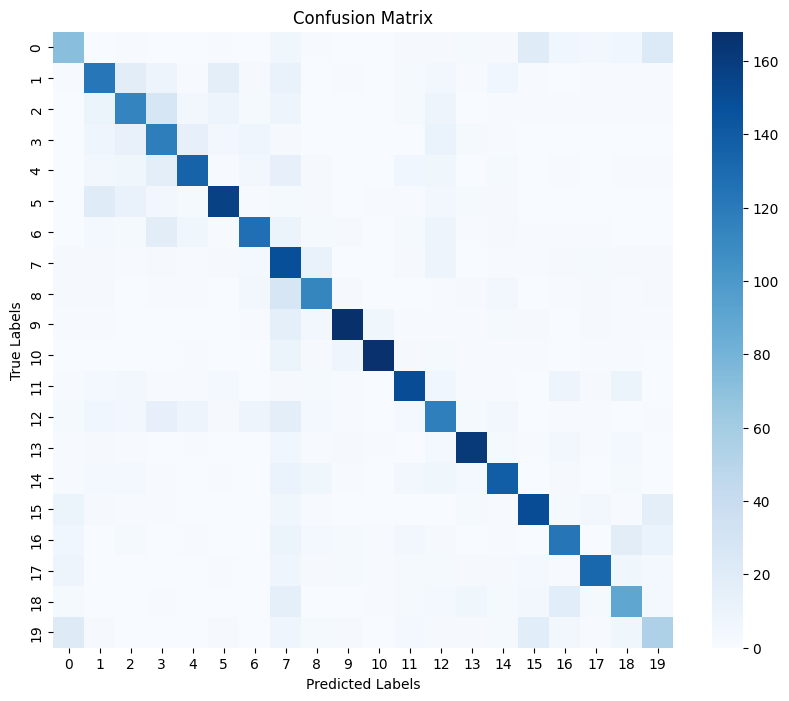


Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.54      0.48      0.51       151
           comp.graphics       0.63      0.60      0.62       202
 comp.os.ms-windows.misc       0.61      0.58      0.60       195
comp.sys.ibm.pc.hardware       0.55      0.64      0.59       183
   comp.sys.mac.hardware       0.75      0.66      0.70       205
          comp.windows.x       0.77      0.73      0.75       215
            misc.forsale       0.77      0.66      0.71       193
               rec.autos       0.43      0.76      0.55       196
         rec.motorcycles       0.68      0.67      0.68       168
      rec.sport.baseball       0.87      0.80      0.83       211
        rec.sport.hockey       0.93      0.84      0.89       198
               sci.crypt       0.76      0.75      0.75       201
         sci.electronics       0.57      0.58      0.57       202
                 sci.med       0.81      0.83      

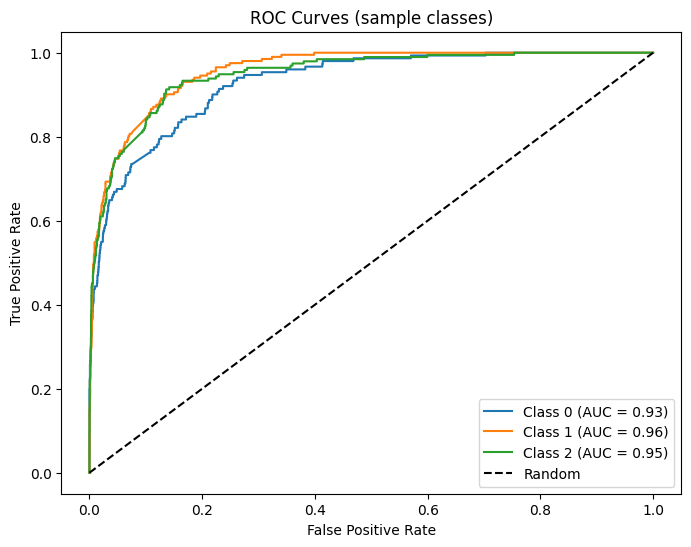


Conclusion:
The model was successfully trained on the 20 Newsgroups dataset using TF-IDF features.
We evaluated the model performance using confusion matrix, precision, recall, F1-score, and ROC curves.
Adam optimizer provided good convergence and accuracy for this text classification problem.


In [ ]:
# Step 1: Import Libraries
import tensorflow as tf
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 2: Load the 20 Newsgroups Dataset
print("Loading dataset...")
data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Step 3: Split the Dataset into Training and Testing Sets
print("Splitting dataset...")
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.2, random_state=42
)

# Step 4: Convert Text Data into Numerical Form Using TfidfVectorizer
print("Converting text to numerical features...")
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

# Step 5: Define the Neural Network Model
print("Building model...")
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(5000,)),                 # Input Layer
    tf.keras.layers.Dense(512, activation="relu"),        # Hidden Layer
    tf.keras.layers.Dense(len(data.target_names), activation="softmax")  # Output Layer
])

# Step 6: Compile the Model
print("Compiling model...")
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Step 7: Train the Model
print("Training model...")
history = model.fit(
    X_train, y_train,
    epochs=5,                   # you can increase for better accuracy
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# Step 8: Evaluate the Model
print("Evaluating model...")
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")

# Step 9: Predictions
print("Generating predictions...")
y_pred_prob = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_prob, axis=1)

# ==============================================================
# Step 10: Confusion Matrix Visualization
# ==============================================================
print("Plotting confusion matrix...")
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# ==============================================================
# Step 11: Precision, Recall, F1-Score
# ==============================================================
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=data.target_names))

# ==============================================================
# Step 12: ROC Curve (for multi-class)
# ==============================================================
print("Plotting ROC Curve...")
y_test_bin = label_binarize(y_test, classes=range(len(data.target_names)))
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot average ROC curve
plt.figure(figsize=(8,6))
for i in range(3):  # Plot first 3 classes for simplicity
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0,1], [0,1], 'k--', label='Random')
plt.title('ROC Curves (sample classes)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# ==============================================================
# Step 13: Conclusion
# ==============================================================
print("\nConclusion:")
print("The model was successfully trained on the 20 Newsgroups dataset using TF-IDF features.")
print("We evaluated the model performance using confusion matrix, precision, recall, F1-score, and ROC curves.")
print("Adam optimizer provided good convergence and accuracy for this text classification problem.")
